# Medicaid and Medicare Staffing Analysis

## Table of Contents <a id='back'></a>
- [Project Introduction](#project-introduction)
    - [Analysis Outline](#analysis-outline)
    - [Results](#results)
- [Importing Libraries and Opening Data Files](#importing-libraries-and-opening-data-files)
- [Pre-Processing Data](#pre-processing-data)
    - [Duplicates](#duplicates)
    - [Missing Values](#missing-values)
    - [Removing Irrelevant Data](#removing-irrelevant-data)
    - [Data Structure Overhaul](#data-structure-overhaul)
        - [Cleaning Headers](#cleaning-headers)
        - [Cleaning Column Elements](#cleaning-column-elements)
- [Part 1: CMS Data Exercise](#part-1-cms-data-exercise)
    - [What are the state performance scores based on the FY 2024 SNF VBP Facility-Level dataset?](#what-are-the-state-performance-scores-based-on-the-fy-2024-snf-vbp-facility-level-dataset)
    - [Does the medical staff incentive payment multiplier affect their performance scores at the state level?](#does-the-medical-staff-incentive-payment-multiplier-affect-their-performance-scores-at-the-state-level)
    - [Which states should be targeted for specific medical staff jobs?](#which-states-should-be-targeted-for-specific-medical-staff-jobs)
    - [To which hospital positions should we allocate more medical staff?](#to-which-hospital-positions-should-we-allocate-more-medical-staff)
    - [Can we increase the number of staff contractors?](#can-we-increase-the-number-of-staff-contractors)
- [Part 2: SQL Test](#part-2-sql-test)
    - [Write a query to return the customer_name, product_name, and total_amount for each sale in the last 30 days.](#write-a-query-to-return-the-customer_name-product_name-and-total_amount-for-each-sale-in-the-last-30-days)
    - [Write a query to find the total revenue generated by each product category in the last year. The output should include the product category and the total revenue for that category.](#write-a-query-to-find-the-total-revenue-generated-by-each-product-category-in-the-last-year-the-output-should-include-the-product-category-and-the-total-revenue-for-that-category)
    - [Write a query to return all customers who made purchases in 2023 and are located in the "West" region.](#write-a-query-to-return-all-customers-who-made-purchases-in-2023-and-are-located-in-the-west-region)
    - [Write a query to display the total number of sales, total quantity sold, and total revenue for each customer. The result should include the customer_name, total sales, total quantity, and total revenue.](#write-a-query-to-display-the-total-number-of-sales-total-quantity-sold-and-total-revenue-for-each-customer-the-result-should-include-the-customer_name-total-sales-total-quantity-and-total-revenue)
    - [Write a query to find the top 3 customers (by total revenue) in the year 2023.](#write-a-query-to-find-the-top-3-customers-by-total-revenue-in-the-year-2023)
    - [Write a query to rank products by their total sales quantity in 2023. The result should include the product_name, total quantity sold, and rank.](#write-a-query-to-rank-products-by-their-total-sales-quantity-in-2023-the-result-should-include-the-product_name-total-quantity-sold-and-rank)
    - [Write a query that categorizes customers into "New" (if they signed up in the last 6 months) or "Existing" based on their sign_up_date. Include the customer_name, region, and category in the result.](#write-a-query-that-categorizes-customers-into-new-if-they-signed-up-in-the-last-6-months-or-existing-based-on-their-sign_up_date-include-the-customer_name-region-and-category-in-the-result)
    - [Write a query to return the month and year along with the total sales for each month for the last 12 months.](#write-a-query-to-return-the-month-and-year-along-with-the-total-sales-for-each-month-for-the-last-12-months)
    - [Write a query to return the product categories that generated more than $50,000 in revenue during the last 6 months.](#write-a-query-to-return-the-product-categories-that-generated-more-than-50000-in-revenue-during-the-last-6-months)
    - [Write a query to check for any sales where the total_amount doesn’t match the expected value (i.e., quantity * price).](#write-a-query-to-check-for-any-sales-where-the-total_amount-doesnt-match-the-expected-value-ie-quantity--price)
- [Conclusions and Reccomendations](#conclusions-and-reccomendations)
- [Dataset Citation](#dataset-citation)

## Project Introduction

The Clipboard Health sales leadership team has asked for recommendations on possible business decisions based on the Q1 2024 Payroll-Based Journal (PBJ) Daily Nurse Staffing dataset. In this analysis, I will analyze the Q1 2024 Payroll-Based Journal (PBJ) Daily Nurse Staffing dataset along with the FY 2024 SNF VBP Facility-Level dataset and State US Averages dataset to provide possible areas for staffing growth.

### Analysis Outline

Within this analysis, in the first half, I will uncover new insights and unusual anomalies within the dataset to see if there are any growth opportunities or new demographics to target. The key questions we are looking for are:

1)	What are the state performance scores based on the FY 2024 SNF VBP Facility-Level dataset?
2)	Does the medical staff incentive payment multiplier affect their performance scores at the state level?
3)	Which states should be targeted for specific medical staff jobs?
4)	To which hospital positions should we allocate more medical staff?
5)	Can we increase the number of staff contractors?

The second half will consist of the SQL test questions:

1)	Write a query to return the customer_name, product_name, and total_amount for each sale in the last 30 days.
2)	Write a query to find the total revenue generated by each product category in the last year. The output should include the product category and the total revenue for that category.
3)	Write a query to return all customers who made purchases in 2023 and are located in the "West" region.
4)	Write a query to display the total number of sales, total quantity sold, and total revenue for each customer. The result should include the customer_name, total sales, total quantity, and total revenue.
5)	Write a query to find the top 3 customers (by total revenue) in the year 2023.
6)	Write a query to rank products by their total sales quantity in 2023. The result should include the product_name, total quantity sold, and rank.
7)	Write a query that categorizes customers into "New" (if they signed up in the last 6 months) or "Existing" based on their sign_up_date. Include the customer_name, region, and category in the result.
8)	Write a query to return the month and year along with the total sales for each month for the last 12 months.
9)	Write a query to return the product categories that generated more than $50,000 in revenue during the last 6 months.
10)	Write a query to check for any sales where the total_amount doesn’t match the expected value (i.e., quantity * price).



### Results

Key Takeaways:

•	States with an incentive payment multiplier greater than or equal to 1 will most likely have higher achievement, improvement, and performance scores and thus will be less likely to need additional staffing. 

•	States with an incentive payment multiplier of less than 1 will be more likely to need more staffing since they are more likely to be overworked, burnt out, or need more work assistance.

•	When looking at the aggregate of hours worked by medical role once some states reach a certain threshold the achievement, improvement, and performance scores start to drop dramatically. This leads to an opportunity for more medical staff in those states with high hours worked and lower achievement, improvement, and performance scores.

•	Certain hospital roles requiring more than 12 hours can use more staffing within those positions. Most workers can only provide about 5 hours of quality work per day with depreciating quality every hour after. Staffing more help in these positions will greatly increase productivity, work quality, and staff morale.

•	Many hospitals experience high turnover rates due to the long hours and high workload. This is an opportunity for Clipboard Health to push more nurses and other medical professionals to do more part-time hours at hospitals. Hospitals will receive higher productivity, quality work, more positive workplace morale, save on full-time benefits, and medical staff members will get the work-life balance they need to stay in the industry long-term.



[Back to Table of Contents](#back)

## Importing Libraries and Opening Data Files

In [1]:
# Importing the needed libraries for this assignment
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import folium
from geopy.geocoders import Nominatim
import requests
import math

In [2]:
# Importing file for assignment
try:
    staff_df = pd.read_csv('PBJ_Daily_Nurse_Staffing_Q1_2024.csv', sep=',', encoding='cp1252', low_memory=False)
except:
    staff_df = pd.read_csv('/datasets/PBJ_Daily_Nurse_Staffing_Q1_2024.csv', sep=',', encoding='cp1252', low_memory=False)

staff_df.head()

,PROVNUM,PROVNAME,CITY,STATE,COUNTY_NAME,COUNTY_FIPS,CY_Qtr,WorkDate,MDScensus,Hrs_RNDON,...,Hrs_LPN_ctr,Hrs_CNA,Hrs_CNA_emp,Hrs_CNA_ctr,Hrs_NAtrn,Hrs_NAtrn_emp,Hrs_NAtrn_ctr,Hrs_MedAide,Hrs_MedAide_emp,Hrs_MedAide_ctr
0,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q1,20240101,50,8.0,...,0.0,156.34,156.34,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q1,20240102,49,8.0,...,0.0,149.40,149.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q1,20240103,49,8.0,...,0.0,147.15,147.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q1,20240104,50,8.0,...,0.0,142.21,142.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q1,20240105,51,8.0,...,0.0,149.40,149.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# Importing file for assignment
try:
    performance = pd.read_csv('FY_2024_SNF_VBP_Facility_Performance.csv', sep=',')
except:
    performance = pd.read_csv('/datasets/FY_2024_SNF_VBP_Facility_Performance.csv', sep=',')

performance.head()

,SNF VBP Program Ranking,Footnote -- SNF VBP Program Ranking,CMS Certification Number (CCN),Provider Name,Provider Address,City/Town,State,ZIP Code,Baseline Period: FY 2019 Risk-Standardized Readmission Rate,Footnote -- Baseline Period: FY 2019 Risk-Standardized Readmission Rate,Performance Period: FY 2022 Risk-Standardized Readmission Rate,Footnote -- Performance Period: FY 2022 Risk-Standardized Readmission Rate,Achievement Score,Footnote -- Achievement Score,Improvement Score,Footnote -- Improvement Score,Performance Score,Footnote -- Performance Score,Incentive Payment Multiplier,Footnote -- Incentive Payment Multiplier
0,7275,NaN,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,0.20018,NaN,0.23768,NaN,0.00000,NaN,0.00000,NaN,0.00000,NaN,0.980254,NaN
1,602,NaN,10044,MARION REGIONAL MEDICAL CENTER,1256 MILITARY STREET SOUTH,HAMILTON,AL,35570,0.17051,NaN,0.17070,NaN,92.53589,NaN,0.00000,NaN,92.53589,NaN,1.017401,NaN
2,712,NaN,10045,FAYETTE MEDICAL CENTER,1653 TEMPLE AVENUE NORTH,FAYETTE,AL,35555,0.18901,NaN,0.17240,NaN,88.46890,NaN,80.88418,NaN,88.46890,NaN,1.017140,NaN
3,2966,NaN,10058,BIBB MEDICAL CENTER,208 PIERSON AVE,CENTREVILLE,AL,35042,0.18295,NaN,0.18755,NaN,52.22488,NaN,0.00000,NaN,52.22488,NaN,1.001067,NaN
4,791,NaN,10065,RUSSELL MEDICAL CENTER,3316 HIGHWAY 280,ALEXANDER CITY,AL,35010,0.19672,NaN,0.17320,NaN,86.55502,NaN,81.95009,NaN,86.55502,NaN,1.016977,NaN


In [4]:
# Importing file for assignment
try:
    state_stats = pd.read_csv('NH_StateUSAverages_Sep2024.csv', sep=',')
except:
    state_stats = pd.read_csv('/datasets/NH_StateUSAverages_Sep2024.csv', sep=',')

state_stats.head()

,State or Nation,Cycle 1 Total Number of Health Deficiencies,Cycle 1 Total Number of Fire Safety Deficiencies,Cycle 2 Total Number of Health Deficiencies,Cycle 2 Total Number of Fire Safety Deficiencies,Cycle 3 Total Number of Health Deficiencies,Cycle 3 Total Number of Fire Safety Deficiencies,Average Number of Residents per Day,Reported Nurse Aide Staffing Hours per Resident per Day,Reported LPN Staffing Hours per Resident per Day,...,Percentage of long stay residents who received an antianxiety or hypnotic medication,Percentage of high risk long stay residents with pressure ulcers,Percentage of long stay residents assessed and appropriately given the seasonal influenza vaccine,Percentage of short stay residents who made improvements in function,Percentage of short stay residents who were assessed and appropriately given the seasonal influenza vaccine,Percentage of short stay residents who were rehospitalized after a nursing home admission,Percentage of short stay residents who had an outpatient emergency department visit,Number of hospitalizations per 1000 long-stay resident days,Number of outpatient emergency department visits per 1000 long-stay resident days,Processing Date
0,NATION,9.6,4.8,9.1,4.4,8.5,4.3,83.0,2.26,0.88,...,19.686361,7.846226,94.859258,76.759582,77.038427,21.473593,11.591186,1.652679,1.652006,2024-09-01
1,AK,7.2,4.6,8.6,6.8,8.7,7.5,36.3,4.36,0.78,...,15.268783,8.928272,98.033410,80.852506,75.412516,17.521198,12.607531,1.045161,1.548693,2024-09-01
2,AL,3.4,3.4,3.0,3.3,3.8,3.2,95.4,2.40,0.81,...,24.012101,8.577385,94.905096,75.129261,79.261184,22.320326,12.228085,1.768343,1.635922,2024-09-01
3,AR,8.1,2.1,8.4,1.9,9.0,1.9,73.7,2.60,0.97,...,21.942394,8.308777,95.664109,80.465340,71.799106,22.747167,13.187986,1.877522,2.055679,2024-09-01
4,AZ,5.4,1.9,8.3,3.1,6.9,3.1,81.7,2.27,1.08,...,19.807363,8.714844,93.573366,77.989887,85.555286,22.618081,10.606475,1.579370,1.456630,2024-09-01


[Back to Table of Contents](#back)

## Pre-Processing Data

In [5]:
# Getting general information about the dataset
staff_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330966 entries, 0 to 1330965
Data columns (total 33 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   PROVNUM           1330966 non-null  object 
 1   PROVNAME          1330966 non-null  object 
 2   CITY              1330966 non-null  object 
 3   STATE             1330966 non-null  object 
 4   COUNTY_NAME       1330966 non-null  object 
 5   COUNTY_FIPS       1330966 non-null  int64  
 6   CY_Qtr            1330966 non-null  object 
 7   WorkDate          1330966 non-null  int64  
 8   MDScensus         1330966 non-null  int64  
 9   Hrs_RNDON         1330966 non-null  float64
 10  Hrs_RNDON_emp     1330966 non-null  float64
 11  Hrs_RNDON_ctr     1330966 non-null  float64
 12  Hrs_RNadmin       1330966 non-null  float64
 13  Hrs_RNadmin_emp   1330966 non-null  float64
 14  Hrs_RNadmin_ctr   1330966 non-null  float64
 15  Hrs_RN            1330966 non-null  float64
 16  

In [6]:
# Getting general information about the dataset
performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10858 entries, 0 to 10857
Data columns (total 20 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   SNF VBP Program Ranking                                                     10858 non-null  int64  
 1   Footnote -- SNF VBP Program Ranking                                         0 non-null      float64
 2   CMS Certification Number (CCN)                                              10858 non-null  int64  
 3   Provider Name                                                               10858 non-null  object 
 4   Provider Address                                                            10858 non-null  object 
 5   City/Town                                                                   10858 non-null  object 
 6   State                                         

In [7]:
# Getting general information about the dataset
state_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 48 columns):
 #   Column                                                                                                       Non-Null Count  Dtype  
---  ------                                                                                                       --------------  -----  
 0   State or Nation                                                                                              54 non-null     object 
 1   Cycle 1 Total Number of Health Deficiencies                                                                  54 non-null     float64
 2   Cycle 1 Total Number of Fire Safety Deficiencies                                                             54 non-null     float64
 3   Cycle 2 Total Number of Health Deficiencies                                                                  54 non-null     float64
 4   Cycle 2 Total Number of Fire Safety Deficiencies                

[Back to Table of Contents](#back)

### Duplicates

In [8]:
# Checking for duplicates
staff_df.duplicated().sum()

0

In [9]:
# Checking for duplicates
performance.duplicated().sum()

0

In [10]:
# Checking for duplicates
state_stats.duplicated().sum()

0

[Back to Table of Contents](#back)

### Missing Values

In [11]:
# Checking for null values
staff_df.isna().sum()

PROVNUM             0
PROVNAME            0
CITY                0
STATE               0
COUNTY_NAME         0
COUNTY_FIPS         0
CY_Qtr              0
WorkDate            0
MDScensus           0
Hrs_RNDON           0
Hrs_RNDON_emp       0
Hrs_RNDON_ctr       0
Hrs_RNadmin         0
Hrs_RNadmin_emp     0
Hrs_RNadmin_ctr     0
Hrs_RN              0
Hrs_RN_emp          0
Hrs_RN_ctr          0
Hrs_LPNadmin        0
Hrs_LPNadmin_emp    0
Hrs_LPNadmin_ctr    0
Hrs_LPN             0
Hrs_LPN_emp         0
Hrs_LPN_ctr         0
Hrs_CNA             0
Hrs_CNA_emp         0
Hrs_CNA_ctr         0
Hrs_NAtrn           0
Hrs_NAtrn_emp       0
Hrs_NAtrn_ctr       0
Hrs_MedAide         0
Hrs_MedAide_emp     0
Hrs_MedAide_ctr     0
dtype: int64

In [12]:
# Checking for null values
performance.isna().sum()

SNF VBP Program Ranking                                                           0
Footnote -- SNF VBP Program Ranking                                           10858
CMS Certification Number (CCN)                                                    0
Provider Name                                                                     0
Provider Address                                                                  0
City/Town                                                                         0
State                                                                             0
ZIP Code                                                                          0
Baseline Period: FY 2019 Risk-Standardized Readmission Rate                       0
Footnote -- Baseline Period: FY 2019 Risk-Standardized Readmission Rate       10341
Performance Period: FY 2022 Risk-Standardized Readmission Rate                    0
Footnote -- Performance Period: FY 2022 Risk-Standardized Readmission Rate  

NOTE: 

For this analysis, I will primarily focus on the quantitative values. I will remove all “footnote” columns and most non-state location-based columns since most of those columns have many unspecified or redundant values and reduce memory usage.

In [13]:
# Checking for null values
state_stats.isna().sum()

State or Nation                                                                                                0
Cycle 1 Total Number of Health Deficiencies                                                                    0
Cycle 1 Total Number of Fire Safety Deficiencies                                                               0
Cycle 2 Total Number of Health Deficiencies                                                                    0
Cycle 2 Total Number of Fire Safety Deficiencies                                                               0
Cycle 3 Total Number of Health Deficiencies                                                                    0
Cycle 3 Total Number of Fire Safety Deficiencies                                                               1
Average Number of Residents per Day                                                                            0
Reported Nurse Aide Staffing Hours per Resident per Day                                         

NOTE:

Since this analysis is limited to 5 key point recommendations, I will remove all the statistics I will not be using for this analysis. 

[Back to Table of Contents](#back)

### Removing Irrelevant Data

In [14]:
# Removing columns we do not need for this analysis
staff_df = staff_df.drop(columns=['PROVNUM', 'PROVNAME', 'CITY', 'COUNTY_NAME', 'COUNTY_FIPS', 'CY_Qtr', 'COUNTY_NAME', 'WorkDate', 'MDScensus'])
staff_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330966 entries, 0 to 1330965
Data columns (total 25 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   STATE             1330966 non-null  object 
 1   Hrs_RNDON         1330966 non-null  float64
 2   Hrs_RNDON_emp     1330966 non-null  float64
 3   Hrs_RNDON_ctr     1330966 non-null  float64
 4   Hrs_RNadmin       1330966 non-null  float64
 5   Hrs_RNadmin_emp   1330966 non-null  float64
 6   Hrs_RNadmin_ctr   1330966 non-null  float64
 7   Hrs_RN            1330966 non-null  float64
 8   Hrs_RN_emp        1330966 non-null  float64
 9   Hrs_RN_ctr        1330966 non-null  float64
 10  Hrs_LPNadmin      1330966 non-null  float64
 11  Hrs_LPNadmin_emp  1330966 non-null  float64
 12  Hrs_LPNadmin_ctr  1330966 non-null  float64
 13  Hrs_LPN           1330966 non-null  float64
 14  Hrs_LPN_emp       1330966 non-null  float64
 15  Hrs_LPN_ctr       1330966 non-null  float64
 16  

In [15]:
# Removing columns we do not need for this analysis
performance = performance.drop(columns=['Footnote -- SNF VBP Program Ranking',
                                        'Footnote -- Baseline Period: FY 2019 Risk-Standardized Readmission Rate',
                                        'Footnote -- Performance Period: FY 2022 Risk-Standardized Readmission Rate',
                                        'Footnote -- Achievement Score',
                                        'Footnote -- Improvement Score',
                                        'Footnote -- Performance Score',
                                        'Footnote -- Incentive Payment Multiplier',
                                        'SNF VBP Program Ranking',
                                        'CMS Certification Number (CCN)',
                                        'Provider Name',
                                        'Provider Address',
                                        'City/Town',
                                        'ZIP Code',
                                        'Baseline Period: FY 2019 Risk-Standardized Readmission Rate',
                                        'Performance Period: FY 2022 Risk-Standardized Readmission Rate'])
performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10858 entries, 0 to 10857
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   State                         10858 non-null  object 
 1   Achievement Score             10858 non-null  float64
 2   Improvement Score             10858 non-null  object 
 3   Performance Score             10858 non-null  float64
 4   Incentive Payment Multiplier  10858 non-null  float64
dtypes: float64(3), object(2)
memory usage: 424.3+ KB


In [16]:
# Keeping the columns we need for this analysis
state_stats = state_stats[['State or Nation',
                           'Average Number of Residents per Day',
                           'Reported Nurse Aide Staffing Hours per Resident per Day',
                           'Reported LPN Staffing Hours per Resident per Day',
                           'Reported RN Staffing Hours per Resident per Day',
                           'Reported Licensed Staffing Hours per Resident per Day',
                           'Reported Total Nurse Staffing Hours per Resident per Day',
                           'Total nursing staff turnover',
                           'Registered Nurse turnover']]
state_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 9 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   State or Nation                                           54 non-null     object 
 1   Average Number of Residents per Day                       54 non-null     float64
 2   Reported Nurse Aide Staffing Hours per Resident per Day   53 non-null     float64
 3   Reported LPN Staffing Hours per Resident per Day          53 non-null     float64
 4   Reported RN Staffing Hours per Resident per Day           53 non-null     float64
 5   Reported Licensed Staffing Hours per Resident per Day     53 non-null     float64
 6   Reported Total Nurse Staffing Hours per Resident per Day  53 non-null     float64
 7   Total nursing staff turnover                              53 non-null     float64
 8   Registered Nurse turnov

[Back to Table of Contents](#back)

### Data Structure Overhaul

#### Cleaning Headers

In [17]:
# Checking for snakecase format
staff_df.columns

Index(['STATE', 'Hrs_RNDON', 'Hrs_RNDON_emp', 'Hrs_RNDON_ctr', 'Hrs_RNadmin',
       'Hrs_RNadmin_emp', 'Hrs_RNadmin_ctr', 'Hrs_RN', 'Hrs_RN_emp',
       'Hrs_RN_ctr', 'Hrs_LPNadmin', 'Hrs_LPNadmin_emp', 'Hrs_LPNadmin_ctr',
       'Hrs_LPN', 'Hrs_LPN_emp', 'Hrs_LPN_ctr', 'Hrs_CNA', 'Hrs_CNA_emp',
       'Hrs_CNA_ctr', 'Hrs_NAtrn', 'Hrs_NAtrn_emp', 'Hrs_NAtrn_ctr',
       'Hrs_MedAide', 'Hrs_MedAide_emp', 'Hrs_MedAide_ctr'],
      dtype='object')

In [18]:
staff_df = staff_df.rename(columns={'STATE': 'state',
                                    'Hrs_RNDON': 'hrs_rn_don',
                                    'Hrs_RNDON_emp': 'hrs_rn_don_emp',
                                    'Hrs_RNDON_ctr': 'hrs_rn_don_ctr',
                                    'Hrs_RNadmin': 'hrs_rn_admin',
                                    'Hrs_RNadmin_emp': 'hrs_rn_admin_emp',
                                    'Hrs_RNadmin_ctr': 'hrs_rn_admin_ctr',
                                    'Hrs_RN': 'hrs_rn',
                                    'Hrs_RN_emp': 'hrs_rn_emp',
                                    'Hrs_RN_ctr': 'hrs_rn_ctr',
                                    'Hrs_LPNadmin': 'hrs_lpn_admin',
                                    'Hrs_LPNadmin_emp': 'hrs_lpn_admin_emp',
                                    'Hrs_LPNadmin_ctr': 'hrs_lpn_admin_ctr',
                                    'Hrs_LPN': 'hrs_lpn',
                                    'Hrs_LPN_emp': 'hrs_lpn_emp',
                                    'Hrs_LPN_ctr': 'hrs_lpn_ctr',
                                    'Hrs_CNA': 'hrs_cna',
                                    'Hrs_CNA_emp': 'hrs_cna_emp',
                                    'Hrs_CNA_ctr': 'hrs_cna_ctr',
                                    'Hrs_NAtrn': 'hrs_na_rn',
                                    'Hrs_NAtrn_emp': 'hrs_na_rn_emp',
                                    'Hrs_NAtrn_ctr': 'hrs_na_rn_ctr',
                                    'Hrs_MedAide': 'hrs_medaide',
                                    'Hrs_MedAide_emp': 'hrs_medaide_emp',
                                    'Hrs_MedAide_ctr': 'hrs_medaide_ctr'})
staff_df.columns

Index(['state', 'hrs_rn_don', 'hrs_rn_don_emp', 'hrs_rn_don_ctr',
       'hrs_rn_admin', 'hrs_rn_admin_emp', 'hrs_rn_admin_ctr', 'hrs_rn',
       'hrs_rn_emp', 'hrs_rn_ctr', 'hrs_lpn_admin', 'hrs_lpn_admin_emp',
       'hrs_lpn_admin_ctr', 'hrs_lpn', 'hrs_lpn_emp', 'hrs_lpn_ctr', 'hrs_cna',
       'hrs_cna_emp', 'hrs_cna_ctr', 'hrs_na_rn', 'hrs_na_rn_emp',
       'hrs_na_rn_ctr', 'hrs_medaide', 'hrs_medaide_emp', 'hrs_medaide_ctr'],
      dtype='object')

In [19]:
# Checking for snakecase format
performance.columns

Index(['State', 'Achievement Score', 'Improvement Score', 'Performance Score',
       'Incentive Payment Multiplier'],
      dtype='object')

In [20]:
performance = performance.rename(columns={'State': 'state',
                                          'Achievement Score': 'achievement_score',
                                          'Improvement Score': 'improvement_score',
                                          'Performance Score': 'performance_score',
                                          'Incentive Payment Multiplier': 'incentive_payment_multiplier',})
performance.columns

Index(['state', 'achievement_score', 'improvement_score', 'performance_score',
       'incentive_payment_multiplier'],
      dtype='object')

In [21]:
state_stats.columns

Index(['State or Nation', 'Average Number of Residents per Day',
       'Reported Nurse Aide Staffing Hours per Resident per Day',
       'Reported LPN Staffing Hours per Resident per Day',
       'Reported RN Staffing Hours per Resident per Day',
       'Reported Licensed Staffing Hours per Resident per Day',
       'Reported Total Nurse Staffing Hours per Resident per Day',
       'Total nursing staff turnover', 'Registered Nurse turnover'],
      dtype='object')

In [22]:
state_stats = state_stats.rename(columns={'State or Nation': 'state',
                                          'Average Number of Residents per Day': 'avg_total_residents_per_day',
                                          'Reported Nurse Aide Staffing Hours per Resident per Day': 'avg_nurse_aide__hours_per_resident_per_day',
                                          'Reported LPN Staffing Hours per Resident per Day': 'avg_lpn_hours_per_resident_per_day',
                                          'Reported RN Staffing Hours per Resident per Day': 'avg_rn_hours_per_resident_per_day',
                                          'Reported Licensed Staffing Hours per Resident per Day': 'avg_licensed_hours_per_resident_per_day',
                                          'Reported Total Nurse Staffing Hours per Resident per Day': 'total_nurse_staff_hours_per_resident_per_day',
                                          'Total nursing staff turnover': 'total_nursing_staff_turnover',
                                          'Registered Nurse turnover': 'rn_turnover'})

state_stats.columns

Index(['state', 'avg_total_residents_per_day',
       'avg_nurse_aide__hours_per_resident_per_day',
       'avg_lpn_hours_per_resident_per_day',
       'avg_rn_hours_per_resident_per_day',
       'avg_licensed_hours_per_resident_per_day',
       'total_nurse_staff_hours_per_resident_per_day',
       'total_nursing_staff_turnover', 'rn_turnover'],
      dtype='object')

[Back to Table of Contents](#back)

#### Cleaning Column Elements

In [23]:
# Converting all string elements into snakecase format
staff_df['state'] = staff_df['state'].str.lower()
staff_df['state'] = staff_df['state'].str.replace(' ', '_')

In [24]:
# Converting all string elements into snakecase format
performance['state'] = performance['state'].str.lower()
performance['state'] = performance['state'].str.replace(' ', '_')

# To change this column into a numberic column we need to fill in unspecificed values to 0 for later numeric data manipulation
performance['improvement_score'] = performance['improvement_score'].str.replace('[^0-9.]', '0')
performance['improvement_score'] = performance['improvement_score'].astype('float')

C:\Users\jason\AppData\Local\Temp\ipykernel_18124\4210204153.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  performance['improvement_score'] = performance['improvement_score'].str.replace('[^0-9.]', '0')


In [25]:
# Converting all string elements into snakecase format
state_stats['state'] = state_stats['state'].str.lower()

[Back to Table of Contents](#back)

## Part 1: CMS Data Exercise

###  What are the state performance scores based on the FY 2024 SNF VBP Facility-Level dataset?

In [26]:
# To filter out the previous unspecified values from the score values, I am filtering out all “0” values since they do not represent hours worked
state_achievement_score = performance[performance['achievement_score'] > 0].groupby('state')['achievement_score'].mean()
# Turning the state index  into a column to later be used to combine into other DataFrames
state_achievement_score = pd.DataFrame.from_dict(state_achievement_score)
state_achievement_score.reset_index(inplace=True)

state_improvement_score = performance[performance['improvement_score'] > 0].groupby('state')['improvement_score'].mean()
# Turning the state index  into a column to later be used to combine into other DataFrames
state_improvement_score = pd.DataFrame.from_dict(state_improvement_score)
state_improvement_score.reset_index(inplace=True)

state_performance_score = performance[performance['performance_score'] > 0].groupby('state')['performance_score'].mean()
# Turning the state index  into a column to later be used to combine into other DataFrames
state_performance_score = pd.DataFrame.from_dict(state_performance_score)
state_performance_score.reset_index(inplace=True)

# The incentive payment multiplier column does not have any “0” values and does not need to be filtered like the other column in this DataFrame
state_incentive_payment_multiplier = performance.groupby('state')['incentive_payment_multiplier'].mean()
state_incentive_payment_multiplier = pd.DataFrame.from_dict(state_incentive_payment_multiplier)
state_incentive_payment_multiplier.reset_index(inplace=True)

# Calculating the aggregate number of hours worked at each position for each state for later analysisis
hours_worked = staff_df.groupby('state').agg({'hrs_rn_don': 'sum',
                                              'hrs_rn_don_emp': 'sum',
                                              'hrs_rn_don_ctr': 'sum',
                                              'hrs_rn_admin': 'sum',
                                              'hrs_rn_admin_emp': 'sum',
                                              'hrs_rn_admin_ctr': 'sum',
                                              'hrs_rn': 'sum',
                                              'hrs_rn_emp': 'sum',
                                              'hrs_rn_ctr': 'sum',
                                              'hrs_lpn_admin': 'sum',
                                              'hrs_lpn_admin_emp': 'sum',
                                              'hrs_lpn_admin_ctr': 'sum',
                                              'hrs_lpn': 'sum', 
                                              'hrs_lpn_emp': 'sum',
                                              'hrs_lpn_ctr': 'sum',
                                              'hrs_cna': 'sum',
                                              'hrs_cna_emp': 'sum',
                                              'hrs_cna_ctr': 'sum',
                                              'hrs_na_rn': 'sum',
                                              'hrs_na_rn_emp': 'sum',
                                              'hrs_na_rn_ctr': 'sum',
                                              'hrs_medaide': 'sum',
                                              'hrs_medaide_emp': 'sum',
                                              'hrs_medaide_ctr': 'sum'}).round(2)
# Turning the state index  into a column to later be used to combine into other DataFrames
hours_worked = pd.DataFrame.from_dict(hours_worked)
hours_worked.reset_index(inplace=True)

In [27]:
# Combining all of our filtered and aggregated data into one DataFrame for analysis
map_hours_score = pd.merge(hours_worked, state_achievement_score, on='state').merge(state_improvement_score, on='state').merge(state_performance_score, on='state').merge(state_incentive_payment_multiplier, on='state')

# Renaming elements for visual appeal and making it easier to read on the rendered map
map_hours_score['achievement_score_str'] = 'Achievement Score: ' + map_hours_score['achievement_score'].round(2).astype('str')
map_hours_score['improvement_score_str'] = 'Improvement Score: ' + map_hours_score['improvement_score'].round(2).astype('str')
map_hours_score['performance_score_str'] = 'Performance Score: ' + map_hours_score['performance_score'].round(2).astype('str')

map_hours_score['incentive_payment_multiplier_str'] = 'Incentive Payment Multiplier: ' + map_hours_score['incentive_payment_multiplier'].round(4).astype('str')

# Adding a latitude and longitude column for GeoPy to add values to
map_hours_score['location_lat'] = ''
map_hours_score['location_long'] = ''

# Renaming state abbreviation values to their full name for GeoPy to more easily identify where the locations are 
# (Some states need to be labeled as a state or GeoPy will identify the wrong location)
map_hours_score['state'] = map_hours_score['state'].replace({'al': 'Alabama',
                                                             'ak': 'Alaska',
                                                             'az': 'Arizona',
                                                             'ar': 'Arkansas',
                                                             'ca': 'California',
                                                             'co': 'Colorado',
                                                             'ct': 'Connecticut',
                                                             'de': 'Delaware',
                                                             'fl': 'Florida',
                                                             'ga': 'Georgia State', # If ‘State’ is not labeled, then GeoPy only retrieves latitude and longitude half of the time
                                                             'hi': 'Hawaii',
                                                             'id': 'Idaho',
                                                             'il': 'Illinois',
                                                             'in': 'Indiana',
                                                             'ia': 'Iowa',
                                                             'ks': 'Kansas',
                                                             'ky': 'Kentucky',
                                                             'la': 'Louisiana',
                                                             'me': 'Maine',
                                                             'md': 'Maryland',
                                                             'ma': 'Massachusetts',
                                                             'mi': 'Michigan',
                                                             'mn': 'Minnesota',
                                                             'ms': 'Mississippi',
                                                             'mo': 'Missouri',
                                                             'mt': 'Montana',
                                                             'ne': 'Nebraska',
                                                             'nv': 'Nevada',
                                                             'nh': 'New Hampshire',
                                                             'nj': 'New Jersey',
                                                             'nm': 'New Mexico',
                                                             'ny': 'New York State', # If ‘State’ is not labeled, then GeoPy will accidentally get the latitude and longitude of New York City
                                                             'nc': 'North Carolina',
                                                             'nd': 'North Dakota',
                                                             'oh': 'Ohio',
                                                             'ok': 'Oklahoma',
                                                             'or': 'Oregon',
                                                             'pa': 'Pennsylvania',
                                                             'ri': 'Rhode Island',
                                                             'sc': 'South Carolina',
                                                             'sd': 'South Dakota',
                                                             'tn': 'Tennessee',
                                                             'tx': 'Texas',
                                                             'ut': 'Utah',
                                                             'vt': 'Vermont',
                                                             'va': 'Virginia',
                                                             'wa': 'Washington State', # If ‘State’ is not labeled, then GeoPy will accidentally get the latitude and longitude of Washington DC
                                                             'wv': 'West Virginia',
                                                             'wi': 'Wisconsin',
                                                             'wy': 'Wyoming',
                                                             'dc': 'District of Columbia'})

In [28]:
geolocator = Nominatim(user_agent='myApp')

# Loop for GeoPy to get the latitude and longitude for each state location 
for i in map_hours_score.index:
    try:
        # GeoPy retrieving address from city
        location = geolocator.geocode(map_hours_score['state'][i], country_codes='us')
        
        # Appending lat/long values to column using dataframe location
        map_hours_score.loc[i,'location_lat'] = location.latitude
        map_hours_score.loc[i,'location_long'] = location.longitude

    except:
        # Exception for the locations where no value is retrieved and appends null value to column
        map_hours_score.loc[i,'location_lat'] = ''
        map_hours_score.loc[i,'location_long'] = ''

In [29]:
# For the loop used to make the Folium map, the data needs to be in a list
map_hours_score_ = map_hours_score.values.tolist()

In [30]:
# Create a map centered on the US
us_map = folium.Map(location=[40, -97],
                        zoom_start=4.5,
                        tiles='Cartodb dark_matter',
                        font_size=15)

# Loop to create map markers and circle markers
for col in map_hours_score_:
    folium.Marker(location=[col[33], col[34]],
                  tooltip=col[0],
                  popup=[col[29], col[30], col[31], col[32]],
                  icon=folium.Icon(color='red',
                                    icon='info-sign')).add_to(us_map)
    
    folium.CircleMarker(location=[col[33], col[34]],
                        radius=10,
                        popup=col[0],
                        color='red',
                        fill_color='red').add_to(us_map)


# Getting GeoJSON data to outline the US states
state_geo = requests.get('https://raw.githubusercontent.com/python-visualization/folium-example-data/main/us_states.json').json()

folium.GeoJson(state_geo,
               style_function=lambda feature:{'fillColor': 'palegreen',
                                              'color': 'limegreen',
                                              'weight': 1,
                                              'dashArray': '5, 5'}).add_to(us_map)
    
us_map.save('us_map.html')
us_map

NOTE:

From the map data, it is interesting that many states with an incentive payment multiplier greater than 1 have notably higher achievement, improvement, and performance scores. When the incentive payment multiplier is higher the quality of work and efficiency of the medical staff are scored higher. Another interesting detail is that states with larger population densities tend to have lower incentive payment scores and overall performance scores.

This could also be seen as a potential area for growth. States with lower performance scores could be the target demographic for staffing needs. If the hospitals in these states are underperforming, they will be more likely to accept more assistance in their staffing needs. Even if the quality of work is lower than average, if the workload is split between even a few more staff members their workload will be lightened, allowing them to redirect their focus to their other tasks thus increasing productivity. The sales team could look to high-density populated areas with low-performance scores to increase staffing, inducing lower hospital workloads for increased productivity.


[Back to Table of Contents](#back)

### Does the medical staff incentive payment multiplier affect their performance scores at the state level?

In [31]:
# Narrowing the number of job types to see macro trends in positions
map_hours_score['hrs_rn_director'] = map_hours_score['hrs_rn_don'] + map_hours_score['hrs_rn_don_emp'] + map_hours_score['hrs_rn_don_ctr']
map_hours_score['hrs_rn_administrator'] = map_hours_score['hrs_rn_admin'] + map_hours_score['hrs_rn_admin_emp'] + map_hours_score['hrs_rn_admin_ctr']
map_hours_score['hrs_reg_nurse'] = map_hours_score['hrs_rn'] + map_hours_score['hrs_rn_emp'] + map_hours_score['hrs_rn_ctr']

map_hours_score['hrs_licensed_practical_nurse_admin'] = map_hours_score['hrs_lpn_admin'] + map_hours_score['hrs_lpn_admin_emp'] + map_hours_score['hrs_lpn_admin_ctr']
map_hours_score['hrs_licensed_practical_nurse'] = map_hours_score['hrs_lpn'] + map_hours_score['hrs_lpn_emp'] + map_hours_score['hrs_lpn_ctr']

map_hours_score['hrs_cert_nurse_assistant'] = map_hours_score['hrs_cna'] + map_hours_score['hrs_cna_emp'] + map_hours_score['hrs_cna_ctr']
map_hours_score['hrs_nurse_assistant'] = map_hours_score['hrs_na_rn'] + map_hours_score['hrs_na_rn_emp'] + map_hours_score['hrs_na_rn_ctr']
map_hours_score['hrs_med_aide'] = map_hours_score['hrs_medaide'] + map_hours_score['hrs_medaide_emp'] + map_hours_score['hrs_medaide_ctr']

# Creating a new DataFrame with only the columns we will need for analysis 
agg_score = map_hours_score[['state','achievement_score', 'improvement_score', 'performance_score',
                             'incentive_payment_multiplier','hrs_rn_director', 'hrs_rn_administrator', 'hrs_reg_nurse',
                             'hrs_licensed_practical_nurse_admin', 'hrs_licensed_practical_nurse', 'hrs_cert_nurse_assistant', 'hrs_nurse_assistant', 'hrs_med_aide']]

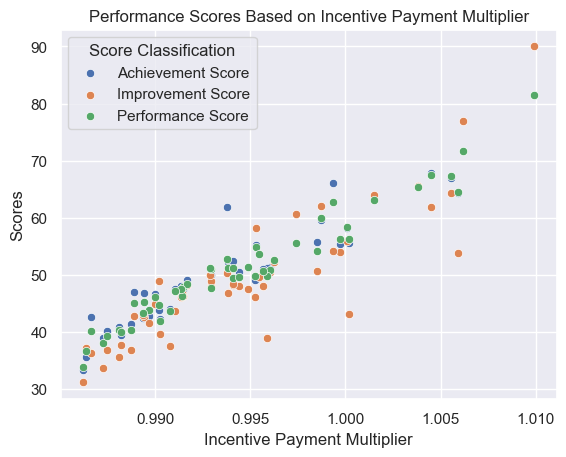

In [32]:
# Setting theme for plots
sns.set_theme(style='darkgrid')

# Plotting the various state performance scores based on the incentive payment multiplier
sns.scatterplot(data=agg_score,
                x='incentive_payment_multiplier',
                y='achievement_score',
                label='Achievement Score')

sns.scatterplot(data=agg_score,
                x='incentive_payment_multiplier',
                y='improvement_score',
                label='Improvement Score')

sns.scatterplot(data=agg_score,
                x='incentive_payment_multiplier',
                y='performance_score',
                label='Performance Score')

# Labeling axes, title, and legend
plt.title('Performance Scores Based on Incentive Payment Multiplier')
plt.xlabel('Incentive Payment Multiplier')
plt.ylabel('Scores')
plt.legend(title='Score Classification')
plt.show()

NOTE:

From the various state scores based on the incentive payment multiplier, there is a clear correlation between the incentive payment multiplier and the performance output of medical workers from all states in the US. There is a stark contrast once the incentive payment multiplier falls below the value of 1 and the various score metrics decline quickly. This plot indicates that many medical workers in the industry perform better when their salary is at the industry average or higher. This supports the previous idea of increasing staffing in certain areas to decrease overall workload which is more likely to lead to higher productivity for each medical staff member.

[Back to Table of Contents](#back)

### Which states should be targeted for specific medical staff jobs?

In [33]:
# Aggregating all three performance scores into one calculate the state total performance scores out of a possible 300 points
agg_score['aggregate_score'] = agg_score['achievement_score'] + agg_score['improvement_score'] + agg_score['performance_score']

C:\Users\jason\AppData\Local\Temp\ipykernel_18124\4166167718.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agg_score['aggregate_score'] = agg_score['achievement_score'] + agg_score['improvement_score'] + agg_score['performance_score']


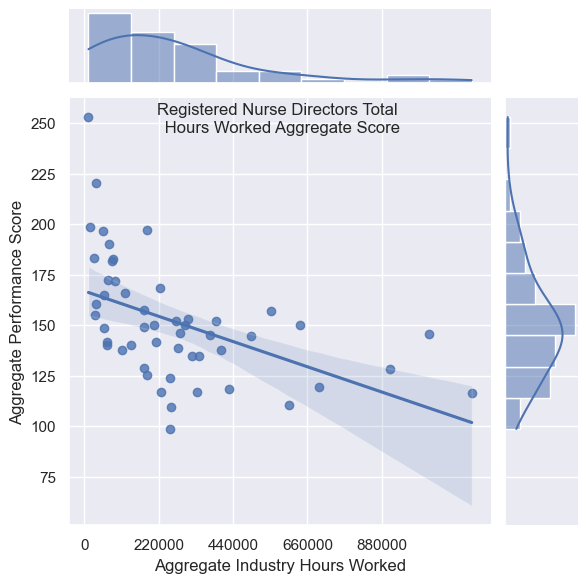

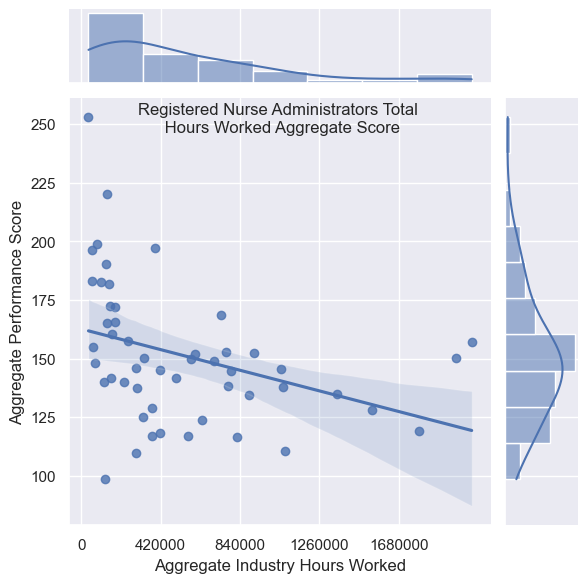

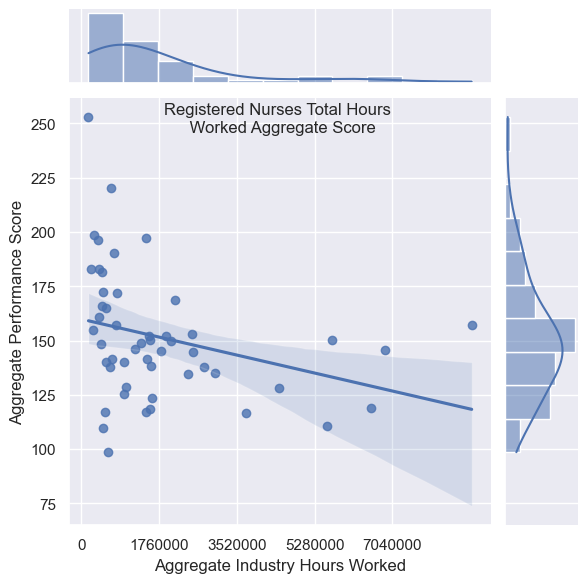

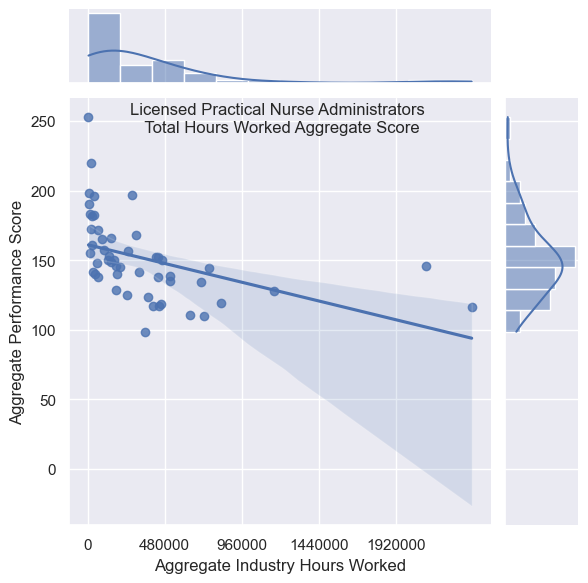

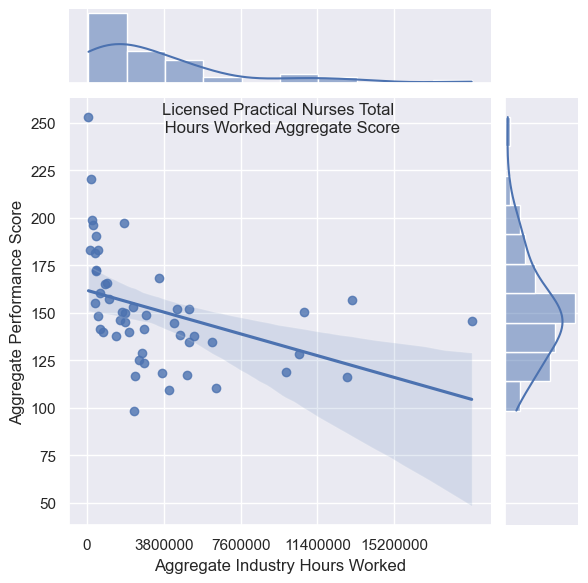

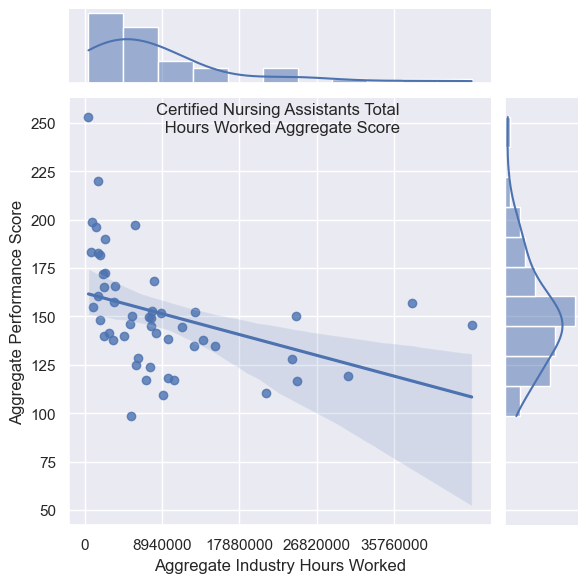

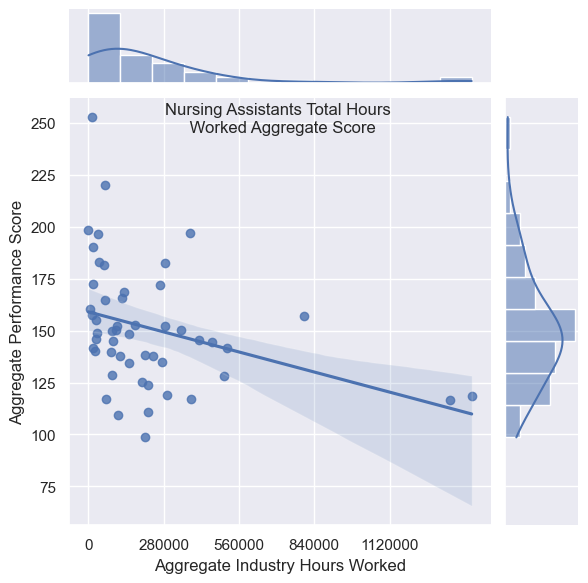

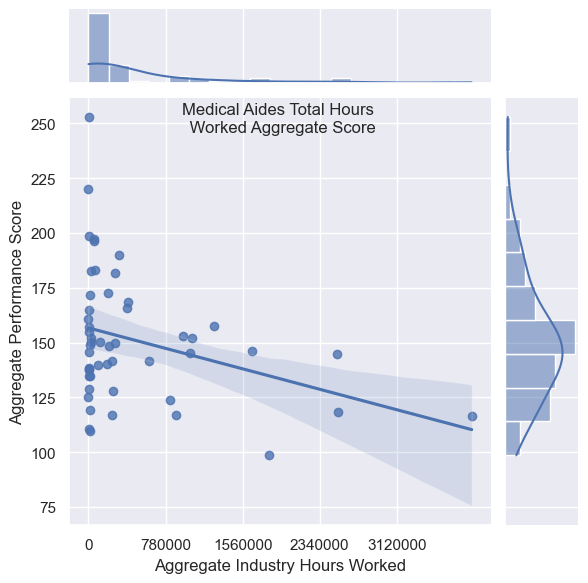

In [34]:
# Plotting the aggregate performance score from the total hours worked by each medical role to see if there is a correlation between the quality of work performed and hours worked
sns.jointplot(data=agg_score,
              x='hrs_rn_director',
              y='aggregate_score',
              kind='reg')
# Labeling axes, title, and legend
plt.title('Registered Nurse Directors Total \n Hours Worked Aggregate Score', x=0.5, y=0.9)
plt.ticklabel_format(style='plain', axis='both')
plt.xlabel('Aggregate Industry Hours Worked')
# Spacing the xticks based on the max x value
plt.xticks(np.arange(0, round(agg_score['hrs_rn_director'].max(), -5), step=round(agg_score['hrs_rn_director'].max(), -5) / 5))
plt.ylabel('Aggregate Performance Score')

sns.jointplot(data=agg_score,
                x='hrs_rn_administrator',
                y='aggregate_score',
                kind='reg')
# Labeling axes, title, and legend
plt.title('Registered Nurse Administrators Total \n Hours Worked Aggregate Score', x=0.5, y=0.9)
plt.ticklabel_format(style='plain', axis='both') 
plt.xlabel('Aggregate Industry Hours Worked')
# Spacing the xticks based on the max x value
plt.xticks(np.arange(0, round(agg_score['hrs_rn_administrator'].max(), -5), step=round(agg_score['hrs_rn_administrator'].max(), -5) / 5))
plt.ylabel('Aggregate Performance Score')

sns.jointplot(data=agg_score,
                x='hrs_reg_nurse',
                y='aggregate_score',
                kind='reg')
# Labeling axes, title, and legend
plt.title('Registered Nurses Total Hours \n Worked Aggregate Score', x=0.5, y=0.9)
plt.ticklabel_format(style='plain', axis='both')
plt.xlabel('Aggregate Industry Hours Worked')
# Spacing the xticks based on the max x value
plt.xticks(np.arange(0, round(agg_score['hrs_reg_nurse'].max(), -5), step=round(agg_score['hrs_reg_nurse'].max(), -5) / 5))
plt.ylabel('Aggregate Performance Score')

sns.jointplot(data=agg_score,
                x='hrs_licensed_practical_nurse_admin',
                y='aggregate_score',
                kind='reg')
# Labeling axes, title, and legend
plt.title('Licensed Practical Nurse Administrators \n Total Hours Worked Aggregate Score', x=0.5, y=0.9)
plt.ticklabel_format(style='plain', axis='both') 
plt.xlabel('Aggregate Industry Hours Worked')
# Spacing the xticks based on the max x value
plt.xticks(np.arange(0, round(agg_score['hrs_licensed_practical_nurse_admin'].max(), -5), step=round(agg_score['hrs_licensed_practical_nurse_admin'].max(), -5) / 5))
plt.ylabel('Aggregate Performance Score')

sns.jointplot(data=agg_score,
                x='hrs_licensed_practical_nurse',
                y='aggregate_score',
                kind='reg')
# Labeling axes, title, and legend
plt.title('Licensed Practical Nurses Total \n Hours Worked Aggregate Score', x=0.5, y=0.9)
plt.ticklabel_format(style='plain', axis='both')
plt.xlabel('Aggregate Industry Hours Worked')
# Spacing the xticks based on the max x value
plt.xticks(np.arange(0, round(agg_score['hrs_licensed_practical_nurse'].max(), -5), step=round(agg_score['hrs_licensed_practical_nurse'].max(), -5) / 5))
plt.ylabel('Aggregate Performance Score')

sns.jointplot(data=agg_score,
                x='hrs_cert_nurse_assistant',
                y='aggregate_score',
                kind='reg')
# Labeling axes, title, and legend
plt.title('Certified Nursing Assistants Total \n Hours Worked Aggregate Score', x=0.5, y=0.9)
plt.ticklabel_format(style='plain', axis='both') 
plt.xlabel('Aggregate Industry Hours Worked')
# Spacing the xticks based on the max x value
plt.xticks(np.arange(0, round(agg_score['hrs_cert_nurse_assistant'].max(), -5), step=round(agg_score['hrs_cert_nurse_assistant'].max(), -5) / 5))
plt.ylabel('Aggregate Performance Score')

sns.jointplot(data=agg_score,
                x='hrs_nurse_assistant',
                y='aggregate_score',
                kind='reg')
# Labeling axes, title, and legend
plt.title('Nursing Assistants Total Hours \n Worked Aggregate Score', x=0.5, y=0.9)
plt.ticklabel_format(style='plain', axis='both') 
plt.xlabel('Aggregate Industry Hours Worked')
# Spacing the xticks based on the max x value
plt.xticks(np.arange(0, round(agg_score['hrs_nurse_assistant'].max(), -5), step=round(agg_score['hrs_nurse_assistant'].max(), -5) / 5))
plt.ylabel('Aggregate Performance Score')

sns.jointplot(data=agg_score,
                x='hrs_med_aide',
                y='aggregate_score',
                kind='reg')
# Labeling axes, title, and legend
plt.title('Medical Aides Total Hours \n Worked Aggregate Score', x=0.5, y=0.9)
plt.ticklabel_format(style='plain', axis='both') 
plt.xlabel('Aggregate Industry Hours Worked')
# Spacing the xticks based on the max x value
plt.xticks(np.arange(0, round(agg_score['hrs_med_aide'].max(), -5), step=round(agg_score['hrs_med_aide'].max(), -5) / 5))
plt.ylabel('Aggregate Performance Score')

plt.show()

In [35]:
# List of states where more registered nurse directors could be staffed
agg_score[agg_score['hrs_rn_director'] > 220000]['state']

2           Arkansas
4         California
9            Florida
10     Georgia State
12              Iowa
14          Illinois
15           Indiana
16            Kansas
17          Kentucky
18         Louisiana
19     Massachusetts
20          Maryland
22          Michigan
23         Minnesota
24          Missouri
27    North Carolina
31        New Jersey
34    New York State
35              Ohio
36          Oklahoma
38      Pennsylvania
42         Tennessee
43             Texas
45          Virginia
48         Wisconsin
Name: state, dtype: object

NOTE:

When examining the total industry hours worked for each medical role, across all roles informs us that when certain states work past an aggregate number of hours their aggregate performance score quickly decreases. For example, in the first plot, when registered nurse directors start working more than 220000, in aggregate per quarter, their overall performance score starts to decline rapidly. This is a possible signal that staff in this specific role, in some states, are overworked or cannot concentrate their quality work effectively. This can be an indicator that medical facilities in these states can use more staff to increase their workplace productivity.

[Back to Table of Contents](#back)

### To which hospital positions should we allocate more medical staff?

In [36]:
# This section will use DataFrame that consists of many columns, and I need to display all of them
pd.set_option('display.max_columns', None)

In [37]:
# Creating a custom function to find the median hours worked for each medical role and turn the 
# product into a DataFrame with the state index as a column
def total_shifts_calc(column):
    avg_shift_hrs = staff_df[staff_df[column] > 0].groupby('state').agg({column: 'mean'}).round(2)
    avg_shift_hrs = pd.DataFrame.from_dict(avg_shift_hrs)
    avg_shift_hrs.reset_index(inplace=True)
    avg_shift_hrs.columns = ['state', f'avg_{column}_worked']
    return avg_shift_hrs

# Applying the custom function and saving the results to a variable
hrs_rn_don = total_shifts_calc('hrs_rn_don')
hrs_rn_don_emp = total_shifts_calc('hrs_rn_don_emp')
hrs_rn_don_ctr = total_shifts_calc('hrs_rn_don_ctr')
hrs_rn_admin = total_shifts_calc('hrs_rn_admin')
hrs_rn_admin_emp = total_shifts_calc('hrs_rn_admin_emp')
hrs_rn_admin_ctr = total_shifts_calc('hrs_rn_admin_ctr')
hrs_rn = total_shifts_calc('hrs_rn')
hrs_rn_emp = total_shifts_calc('hrs_rn_emp')
hrs_rn_ctr = total_shifts_calc('hrs_rn_ctr')
hrs_lpn_admin = total_shifts_calc('hrs_lpn_admin')
hrs_lpn_admin_emp = total_shifts_calc('hrs_lpn_admin_emp')
hrs_lpn_admin_ctr = total_shifts_calc('hrs_lpn_admin_ctr')
hrs_lpn = total_shifts_calc('hrs_lpn')
hrs_lpn_emp = total_shifts_calc('hrs_lpn_emp')
hrs_lpn_ctr = total_shifts_calc('hrs_lpn_ctr')
hrs_cna = total_shifts_calc('hrs_cna')
hrs_cna_emp = total_shifts_calc('hrs_cna_emp')
hrs_cna_ctr = total_shifts_calc('hrs_cna_ctr')
hrs_na_rn = total_shifts_calc('hrs_na_rn')
hrs_na_rn_emp = total_shifts_calc('hrs_na_rn_emp')
hrs_na_rn_ctr = total_shifts_calc('hrs_na_rn_ctr')
hrs_medaide = total_shifts_calc('hrs_medaide')
hrs_medaide_emp = total_shifts_calc('hrs_medaide_emp')
hrs_medaide_ctr = total_shifts_calc('hrs_medaide_ctr')

# Making a list consisting of all the new DataFrames
df_list = [hrs_rn_don, hrs_rn_don_emp, hrs_rn_don_ctr, hrs_rn_admin, hrs_rn_admin_emp, hrs_rn_admin_ctr,
           hrs_rn, hrs_rn_emp, hrs_rn_ctr, hrs_lpn_admin, hrs_lpn_admin_emp, hrs_lpn_admin_ctr,
           hrs_lpn, hrs_lpn_emp, hrs_lpn_ctr, hrs_cna, hrs_cna_emp, hrs_cna_ctr, 
           hrs_na_rn, hrs_na_rn_emp, hrs_na_rn_ctr, hrs_medaide, hrs_medaide_emp, hrs_medaide_ctr]

# Initialize the mergeing of following DataFrame with the first DataFrame
shifts_per_state = df_list[0]

# Loop to merge the remaining DataFrames
for df in df_list[1:]:
    shifts_per_state = pd.merge(shifts_per_state, df, on='state', how='left')

display(shifts_per_state)

,state,avg_hrs_rn_don_worked,avg_hrs_rn_don_emp_worked,avg_hrs_rn_don_ctr_worked,avg_hrs_rn_admin_worked,avg_hrs_rn_admin_emp_worked,avg_hrs_rn_admin_ctr_worked,avg_hrs_rn_worked,avg_hrs_rn_emp_worked,avg_hrs_rn_ctr_worked,avg_hrs_lpn_admin_worked,avg_hrs_lpn_admin_emp_worked,avg_hrs_lpn_admin_ctr_worked,avg_hrs_lpn_worked,avg_hrs_lpn_emp_worked,avg_hrs_lpn_ctr_worked,avg_hrs_cna_worked,avg_hrs_cna_emp_worked,avg_hrs_cna_ctr_worked,avg_hrs_na_rn_worked,avg_hrs_na_rn_emp_worked,avg_hrs_na_rn_ctr_worked,avg_hrs_medaide_worked,avg_hrs_medaide_emp_worked,avg_hrs_medaide_ctr_worked
0,ak,8.02,8.01,8.00,22.28,22.28,NaN,59.36,51.57,22.06,13.40,13.40,NaN,39.81,34.59,15.93,152.44,133.28,57.64,21.73,21.73,NaN,27.53,27.53,NaN
1,al,8.22,8.21,8.30,18.86,18.82,9.36,37.26,36.71,17.96,17.72,17.72,7.00,70.31,68.02,20.22,201.90,199.46,34.09,34.64,34.64,NaN,31.21,31.21,NaN
2,ar,8.49,8.49,8.00,13.80,12.98,6.22,17.44,17.24,14.40,17.35,17.32,7.87,60.78,58.42,26.49,180.28,177.57,35.90,20.12,20.12,NaN,19.83,19.83,NaN
3,az,8.28,8.28,7.94,14.76,14.74,7.03,39.10,36.51,19.74,14.49,14.50,8.30,82.25,77.50,19.40,180.20,169.06,37.80,17.15,17.26,10.31,22.34,22.34,NaN
4,ca,8.16,8.15,8.04,13.54,13.53,8.71,35.17,34.46,12.49,18.34,18.30,9.14,92.71,90.07,17.14,216.50,207.49,36.80,28.17,28.19,7.13,6.85,6.85,NaN
5,co,8.55,8.55,8.70,15.71,15.85,4.59,42.29,40.35,13.62,12.91,12.91,4.27,48.34,43.45,19.61,144.12,131.00,31.45,16.52,16.53,7.71,19.88,19.07,19.70
6,ct,8.23,8.23,7.79,26.57,25.89,10.40,40.73,38.76,11.06,11.85,11.46,11.84,82.97,77.10,18.39,215.13,204.19,30.63,14.84,14.84,15.75,27.31,39.02,14.38
7,dc,8.71,8.71,NaN,33.96,33.95,6.50,93.98,85.15,29.81,21.35,21.35,NaN,96.45,92.94,21.20,285.41,261.38,92.63,7.22,7.22,NaN,14.13,14.13,NaN
8,de,7.75,7.71,8.82,26.88,26.58,15.31,50.79,42.87,25.53,13.02,13.19,8.64,81.62,66.32,31.15,198.47,176.07,52.96,13.25,13.25,NaN,NaN,NaN,NaN
9,fl,8.55,8.55,8.46,20.21,20.13,8.11,52.51,51.05,16.18,14.31,14.31,7.17,78.84,74.64,24.46,241.55,236.61,40.67,21.96,21.96,NaN,22.50,27.03,9.83


NOTE:

Astonishingly, some medical roles require more than 12-hour shifts, indicating a considerable opportunity for additional staffing. Many studies suggest that most people can focus and produce about 5 hours of quality work daily. Every hour after 5 hours will result in declining levels of concentration leading to lower quality work. This is one of the many areas of improvement for the medical industry where a larger staff can lead to higher quality work and productivity. For example, a medical establishment can easily be persuaded to increase certified nursing assistants (cna) staff, who work multi-day shifts, to increase productivity and quality of work. 

[Back to Table of Contents](#back)

### Can we increase the number of staff contractors?

In [38]:
# The first row in the DataFrame is not a state data point and will not be needed for this analysis 
state_stats = state_stats.drop(0)

In [39]:
# Aggregating the total number of hours spent on hospital residents for a macro view of the data 
state_stats['total_avg_hours_on_residents'] = state_stats['avg_nurse_aide__hours_per_resident_per_day'] + state_stats['avg_lpn_hours_per_resident_per_day'] + state_stats['avg_rn_hours_per_resident_per_day'] + state_stats['avg_licensed_hours_per_resident_per_day'] + state_stats['total_nurse_staff_hours_per_resident_per_day']

state_stats['total_avg_hours_on_residents'] = state_stats['total_avg_hours_on_residents'].round(2)

# Creating a new DataFrame with only the columns we will need
state_stats = state_stats[['state', 'avg_total_residents_per_day', 'total_avg_hours_on_residents', 'total_nursing_staff_turnover', 'rn_turnover']]
display(state_stats)

,state,avg_total_residents_per_day,total_avg_hours_on_residents,total_nursing_staff_turnover,rn_turnover
1,ak,36.3,17.35,45.3,42.0
2,al,95.4,9.03,49.2,43.8
3,ar,73.7,9.34,51.4,47.4
4,az,81.7,9.92,49.9,47.9
5,ca,85.4,10.61,41.5,43.4
6,co,70.2,8.98,55.2,51.0
7,ct,100.2,9.06,39.7,40.3
8,dc,119.2,12.03,30.6,30.6
9,de,88.3,10.97,49.5,44.9
10,fl,106.5,9.22,46.3,49.4


NOTE:

Assumptions: The data source does not specify or give enough context to the data in their data description section. For this analysis, I am interpreting turnover rate numbers are percentages of medical staff turnover and not a numeric total of those who have left the field at a state level.

The turnover rates for the industry in aggregate are alarmingly high. There could be many reasons for medical industry members to leave their jobs which leads to an opportunity to increase the number of medical contractors for Clipboard Health. In the previous section, several job positions can be seen as overworked and may temporarily, or worse permanently, leave the industry due to burnout. Clipboard Health can contact medical facilities to staff more employees working fewer hours as part-time employees. This scenario can be seen as a win-win situation for all parties involved. The health facilities get higher quality production from their staff and cut costs with the benefits of full-time employees, the staff members employed can work the hours they are comfortable with, and Clipboard Health can get their commission on supplying the workforce.

[Back to Table of Contents](#back)

## Part 2: SQL Test

Instructions: Please write SQL queries for each of the following questions. You may assume that all tables follow typical database conventions unless otherwise specified.

Tables:

Assume you have the following tables in your database:

Sales

sales_id (INT)

customer_id (INT)

product_id (INT)

sale_date (DATE)

quantity (INT)

total_amount (DECIMAL)

Customers

customer_id (INT)

customer_name (VARCHAR)

sales_region (VARCHAR)

sign_up_date (DATE)

Products

product_id (INT)

product_name (VARCHAR)

category (VARCHAR)

price (DECIMAL)


### Write a query to return the customer_name, product_name, and total_amount for each sale in the last 30 days.

SELECT c.customer_name,
    p.product_name,
    s.total_amount

FROM Customers c 
    JOIN Sales s
    ON c.customer_id = s.customer_id
    JOIN Products p
    ON s.product_id = p.product_id

WHERE s.sale_date >= CURDATE() - INTERVAL 30 DAY

[Back to Table of Contents](#back)

### Write a query to find the total revenue generated by each product category in the last year. The output should include the product category and the total revenue for that category.

SELECT p.category,
    s.SUM(total_amount) total_revenue

FROM Products p
    JOIN Sales s
    ON p.product_id = s.product_id

[Back to Table of Contents](#back)

### Write a query to return all customers who made purchases in 2023 and are located in the "West" region.

SELECT c.customer_name

FROM Customers c
    JOIN Sales s
    ON c.customer_id = s.customer_id

WHERE YEAR(s.sale_date) = 2023
    AND c.sales_region = 'West'

[Back to Table of Contents](#back)

### Write a query to display the total number of sales, total quantity sold, and total revenue for each customer. The result should include the customer_name, total sales, total quantity, and total revenue.

SELECT c.customer_name,
    COUNT(s.sales_id) total_sales,
    SUM(s.quantity) total_quantity,
    SUM(s.total_amount) total_revenue

FROM Customers c
    JOIN Sales s
    ON c.customer_id = s.customer_id

[Back to Table of Contents](#back)

### Write a query to find the top 3 customers (by total revenue) in the year 2023.

SELECT c.customer_name,
    SUM(s.total_amount) total_revenue

FROM Customers c
    JOIN Sales s
    ON c.customer_id = s.customer_id

WHERE YEAR(s.sale_date) = 2023

GROUP BY c.customer_name

ORDER BY total_revenue DESC

LIMIT 3

[Back to Table of Contents](#back)

### Write a query to rank products by their total sales quantity in 2023. The result should include the product_name, total quantity sold, and rank.

SELECT p.product_name, 
    SUM(s.quantity) total_quantity, 
    RANK () OVER (ORDER BY total_quantity DESC) rank_number

FROM Products p
    INNER JOIN Sales s
    ON s.product_id = p.product_id

WHERE YEAR(s.sale_date) = 2023

ORDER BY total_quantity DESC

[Back to Table of Contents](#back)

### Write a query that categorizes customers into "New" (if they signed up in the last 6 months) or "Existing" based on their sign_up_date. Include the customer_name, region, and category in the result.

SELECT c.customer_name,
    c.sales_region,
    CASE
        WHEN c.sign_up_date >= CURDATE() - INTERVAL 6 MONTH
            THEN 'New'
        ELSE 'Existing'
    END customer_categorizer
    
FROM Customers c

[Back to Table of Contents](#back)

### Write a query to return the month and year along with the total sales for each month for the last 12 months.

SELECT DATE_FORMAT(s.sale_date, '%m') month,
    DATE_FORMAT(s.sale_date, '%m') year,
    SUM(s.total_amount) total_sales

FROM Sales s

WHERE s.sale_date >= CURDATE() - INTERVAL 12 MONTH

GROUP BY month, 
    year

ORDER BY month DESC,
    year DESC

[Back to Table of Contents](#back)

### Write a query to return the product categories that generated more than $50,000 in revenue during the last 6 months.

SELECT p.category

FROM Products p
    JOIN Sales s
    ON p.product_id = s.product_id

WHERE s.sale_date >= CURDATE() - INTERVAL 6 MONTH

GROUP BY p.category

HAVING SUM(s.total_amount) > 50000

[Back to Table of Contents](#back)

### Write a query to check for any sales where the total_amount doesn’t match the expected value (i.e., quantity * price).

SELECT s.sales_id,
    c.customer_name,
    p.product_name,
    (p.price * s.quantity) expected_total

FROM Sales s
    JOIN Products p
    ON s.customer_id = p.customer_id
    JOIN Customers c
    ON p.customer_id = c.customer_id

WHERE s.total_amount != expected_total

[Back to Table of Contents](#back)

## Conclusions and Reccomendations

•	States with an incentive payment multiplier greater than or equal to 1 will most likely have higher achievement, improvement, and performance scores and thus will be less likely to need additional staffing. 

•	States with an incentive payment multiplier of less than 1 will be more likely to need more staffing since they are more likely to be overworked, burnt out, or need more work assistance.

•	When looking at the aggregate of hours worked by medical role once some states reach a certain threshold the achievement, improvement, and performance scores start to drop dramatically. This leads to an opportunity for more medical staff in those states with high hours worked and lower achievement, improvement, and performance scores.

•	Certain hospital roles requiring more than 12 hours can use more staffing within those positions. Most workers can only provide about 5 hours of quality work per day with depreciating quality every hour after. Staffing more help in these positions will greatly increase productivity, work quality, and staff morale.

•	Many hospitals experience high turnover rates due to the long hours and high workload. This is an opportunity for Clipboard Health to push more nurses and other medical professionals to do more part-time hours at hospitals. Hospitals will receive higher productivity, quality work, more positive workplace morale, save on full-time benefits, and medical staff members will get the work-life balance they need to stay in the industry long-term.

[Back to Table of Contents](#back)

## Dataset Citation

Data.CMS.gov. (2024, April). Payroll Based Journal Daily Nurse Staffing, Version 1. Retrieved October 5, 2024 from [Data.CMS.gov](https://data.cms.gov/quality-of-care/payroll-based-journal-daily-nurse-staffing/data).

Data.CMS.gov. (2024, September). FY 2024 SNF VBP Facility-Level Dataset, Version 1. Retrieved October 5, 2024 from [Data.CMS.gov](https://data.cms.gov/provider-data/dataset/284v-j9fz#data-table).

Data.CMS.gov. (2024, September). State US Averages, Version 1. Retrieved October 5, 2024 from [Data.CMS.gov](https://data.cms.gov/provider-data/dataset/xcdc-v8bm).

[Back to Table of Contents](#back)